In [1]:
import pandas as pd 

data = pd.read_csv('./Data/data_tm_final_2.csv', index_col=False)

In [31]:
data = data[(data['estimacionOcupacionAbordo'] < 250) & (data['estimacionOcupacionAbordo'] >= 0)]

data['franja_horaria'] = pd.cut(data['hora'], 
                                bins=[0, 4, 8, 16, 18, 24], 
                                labels=['0-4am', '4-8am', '8am-4pm', '4-6pm', '6-11pm'],
                                right=False)

In [32]:
data

,fecha,fechaHoraLecturaDato,NombreParada,nombre_ruta,numero_estacion,latitud_parada,longitud_parada,latitud_parada0,longitud_parada0,latitud_parada25,...,latitud_parada50,longitud_parada50,latitud_parada75,longitud_parada75,latitud_parada100,longitud_parada100,estimacionOcupacionAbordo,hora,dia_semana,franja_horaria
0,2023-10-23,1900-01-01 15:47:38,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,90.0,15,Monday,8am-4pm
1,2023-10-23,1900-01-01 23:22:56,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,56.0,23,Monday,6-11pm
2,2023-10-23,1900-01-01 21:43:21,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,70.0,21,Monday,6-11pm
3,2023-10-23,1900-01-01 20:08:01,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,63.0,20,Monday,6-11pm
4,2023-10-23,1900-01-01 23:07:26,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,72.0,23,Monday,6-11pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317736,2023-11-03,1900-01-01 17:18:07,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,77.0,17,Friday,4-6pm
1317737,2023-11-03,1900-01-01 15:01:31,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,121.0,15,Friday,8am-4pm
1317738,2023-11-03,1900-01-01 10:18:04,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,53.0,10,Friday,8am-4pm
1317739,2023-11-03,1900-01-01 18:29:38,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,120.0,18,Friday,6-11pm


In [33]:
data[data['estimacionOcupacionAbordo'] == 0]['nombre_ruta'].value_counts()

nombre_ruta
C15 Portal Suba        2293
H15 Portal Suba        1969
G12 Portal Sur         1967
B72 Toberín            1767
B12 Portal Norte       1673
                       ... 
G45 Portal Sur JFK       53
G52 Portal Sur           48
B50 Calle 161            34
K43 CAD                  29
G12 Gral. Santander      25
Name: count, Length: 78, dtype: int64

In [34]:
data[data['estimacionOcupacionAbordo'] == 0]['NombreParada'].value_counts()

NombreParada
Portal Usme     5888
Portal Suba     4296
Portal Norte    4294
Portal 80       3704
Portal Tunal    3676
                ... 
Alquería          22
León XIII         12
La Despensa        8
Gobernación        6
Normandía          1
Name: count, Length: 141, dtype: int64

In [35]:
data['fecha'].value_counts().sort_index(ascending=False)

fecha
2023-11-03    133495
2023-11-02    128350
2023-11-01    136433
2023-10-31    134316
2023-10-30    136239
2023-10-27    125782
2023-10-26    130064
2023-10-25    128927
2023-10-24    128781
2023-10-23    126644
Name: count, dtype: int64

In [36]:
data[['hora', 'latitud_parada', 'longitud_parada', 'estimacionOcupacionAbordo']].describe().applymap(lambda x: '{:,.2f}'.format(x))

/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/4041918640.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[['hora', 'latitud_parada', 'longitud_parada', 'estimacionOcupacionAbordo']].describe().applymap(lambda x: '{:,.2f}'.format(x))


,hora,latitud_parada,longitud_parada,estimacionOcupacionAbordo
count,"1,309,031.00","1,309,031.00","1,309,031.00","1,309,031.00"
mean,13.06,4.65,-74.09,76.16
std,5.19,0.05,0.03,52.74
min,3.00,4.53,-74.21,0.00
25%,8.00,4.61,-74.10,36.00
50%,13.00,4.64,-74.08,68.00
75%,18.00,4.68,-74.07,108.00
max,23.00,4.77,-74.04,249.00


In [37]:
data = data[(data['estimacionOcupacionAbordo'] < 250) & (data['estimacionOcupacionAbordo'] >= 0) & (data['franja_horaria'] != '0-4am')]

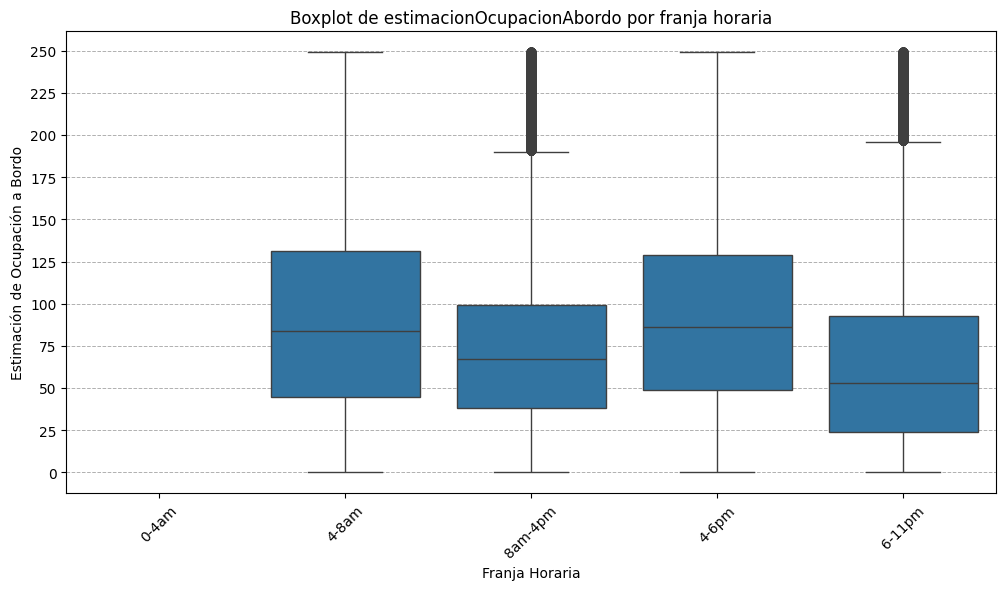

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='franja_horaria', y='estimacionOcupacionAbordo', data=data)
plt.xticks(rotation=45)
plt.yticks(range(0, int(data['estimacionOcupacionAbordo'].max()) + 25, 25))
plt.title('Boxplot de estimacionOcupacionAbordo por franja horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Estimación de Ocupación a Bordo')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [39]:
franja_describe = data.groupby('franja_horaria')['estimacionOcupacionAbordo'].describe()
print(franja_describe)

                   count       mean        std  min   25%   50%    75%    max
franja_horaria                                                               
0-4am                0.0        NaN        NaN  NaN   NaN   NaN    NaN    NaN
4-8am           257989.0  91.613542  59.125641  0.0  45.0  84.0  131.0  249.0
8am-4pm         549761.0  71.662024  46.320973  0.0  38.0  67.0   99.0  249.0
4-6pm           167031.0  91.332262  56.746084  0.0  49.0  86.0  129.0  249.0
6-11pm          334211.0  64.039218  50.784598  0.0  24.0  53.0   93.0  249.0


/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/2968114586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  franja_describe = data.groupby('franja_horaria')['estimacionOcupacionAbordo'].describe()


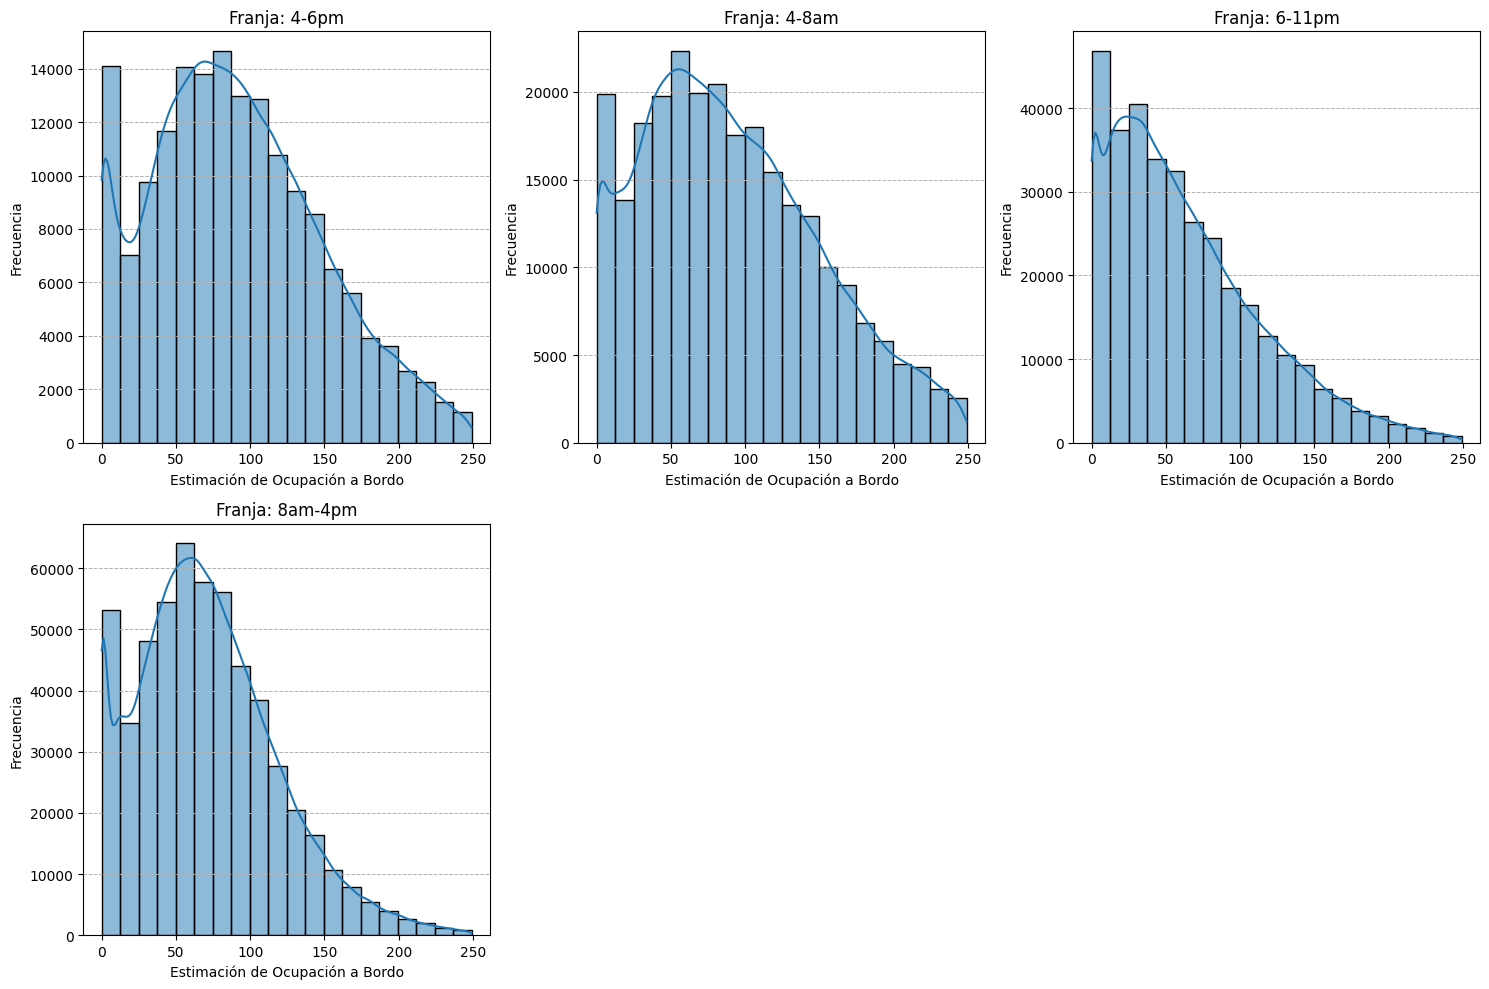

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las franjas horarias únicas
franjas = sorted(data['franja_horaria'].unique())

# Crear los subplots con una cantidad adecuada de filas y columnas
num_franjas = len(franjas)
cols = 3  # Número de columnas en la cuadrícula
rows = -(-num_franjas // cols)  # Redondeo hacia arriba para obtener las filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Convertir en una lista para facilitar la iteración

# Generar un histograma para cada franja horaria
for i, franja in enumerate(franjas):
    ax = axes[i]
    sns.histplot(data[data['franja_horaria'] == franja]['estimacionOcupacionAbordo'], bins=20, kde=True, ax=ax)
    ax.set_title(f'Franja: {franja}')
    ax.set_xlabel('Estimación de Ocupación a Bordo')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', linestyle='--', linewidth=0.7)

# Ocultar los subplots vacíos si hay más espacios de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [41]:
data

,fecha,fechaHoraLecturaDato,NombreParada,nombre_ruta,numero_estacion,latitud_parada,longitud_parada,latitud_parada0,longitud_parada0,latitud_parada25,...,latitud_parada50,longitud_parada50,latitud_parada75,longitud_parada75,latitud_parada100,longitud_parada100,estimacionOcupacionAbordo,hora,dia_semana,franja_horaria
0,2023-10-23,1900-01-01 15:47:38,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,90.0,15,Monday,8am-4pm
1,2023-10-23,1900-01-01 23:22:56,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,56.0,23,Monday,6-11pm
2,2023-10-23,1900-01-01 21:43:21,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,70.0,21,Monday,6-11pm
3,2023-10-23,1900-01-01 20:08:01,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,63.0,20,Monday,6-11pm
4,2023-10-23,1900-01-01 23:07:26,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,72.0,23,Monday,6-11pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317736,2023-11-03,1900-01-01 17:18:07,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,77.0,17,Friday,4-6pm
1317737,2023-11-03,1900-01-01 15:01:31,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,121.0,15,Friday,8am-4pm
1317738,2023-11-03,1900-01-01 10:18:04,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,53.0,10,Friday,8am-4pm
1317739,2023-11-03,1900-01-01 18:29:38,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,120.0,18,Friday,6-11pm


/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/3399172393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S')
/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/3399172393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hora'] = data['fechaHoraLecturaDato'].dt.hour  # Extraer la hora para análisis horario


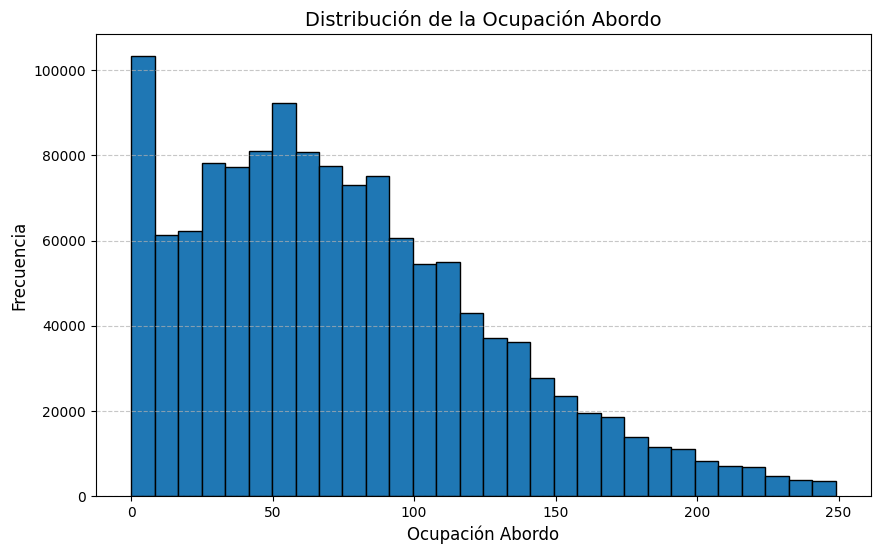

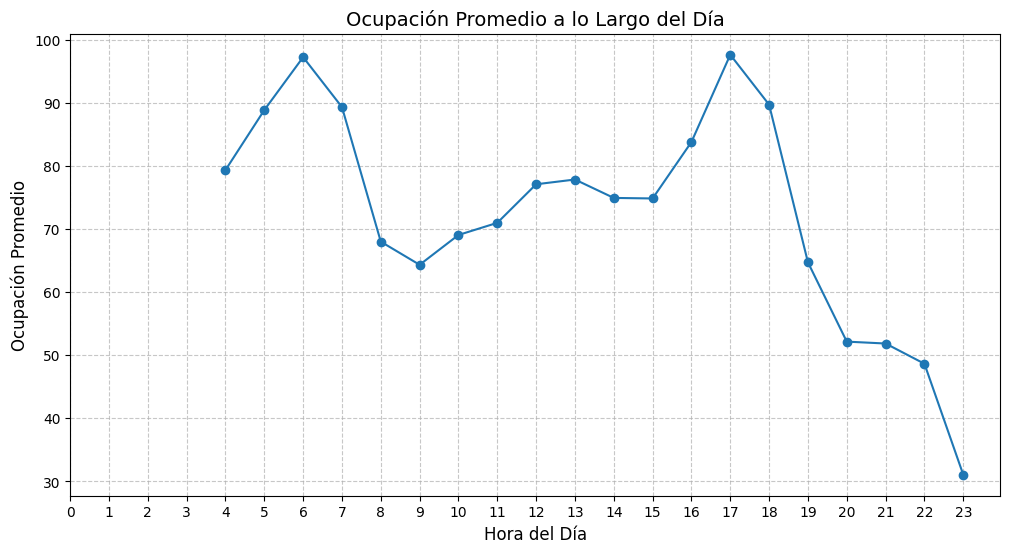

count    1.308992e+06
mean     7.615799e+01
std      5.274429e+01
min      0.000000e+00
25%      3.600000e+01
50%      6.800000e+01
75%      1.080000e+02
max      2.490000e+02
Name: estimacionOcupacionAbordo, dtype: float64

In [42]:
import matplotlib.pyplot as plt

# Convertir columnas de fecha y hora en formato datetime para análisis
data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S')
data['hora'] = data['fechaHoraLecturaDato'].dt.hour  # Extraer la hora para análisis horario

# Resumen estadístico del campo de ocupación
ocupacion_summary = data['estimacionOcupacionAbordo'].describe()

# Distribución de la ocupación
plt.figure(figsize=(10, 6))
plt.hist(data['estimacionOcupacionAbordo'], bins=30, edgecolor='black')
plt.title('Distribución de la Ocupación Abordo', fontsize=14)
plt.xlabel('Ocupación Abordo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ocupación promedio por hora
ocupacion_horaria = data.groupby('hora')['estimacionOcupacionAbordo'].mean()

# Comportamiento horario
plt.figure(figsize=(12, 6))
plt.plot(ocupacion_horaria.index, ocupacion_horaria.values, marker='o')
plt.title('Ocupación Promedio a lo Largo del Día', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Ocupación Promedio', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

# Mostrar resumen estadístico
ocupacion_summary

/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/3870616255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha'] = pd.to_datetime(data['fecha'])
/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/3870616255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dia_semana'] = data['fecha'].dt.day_name()


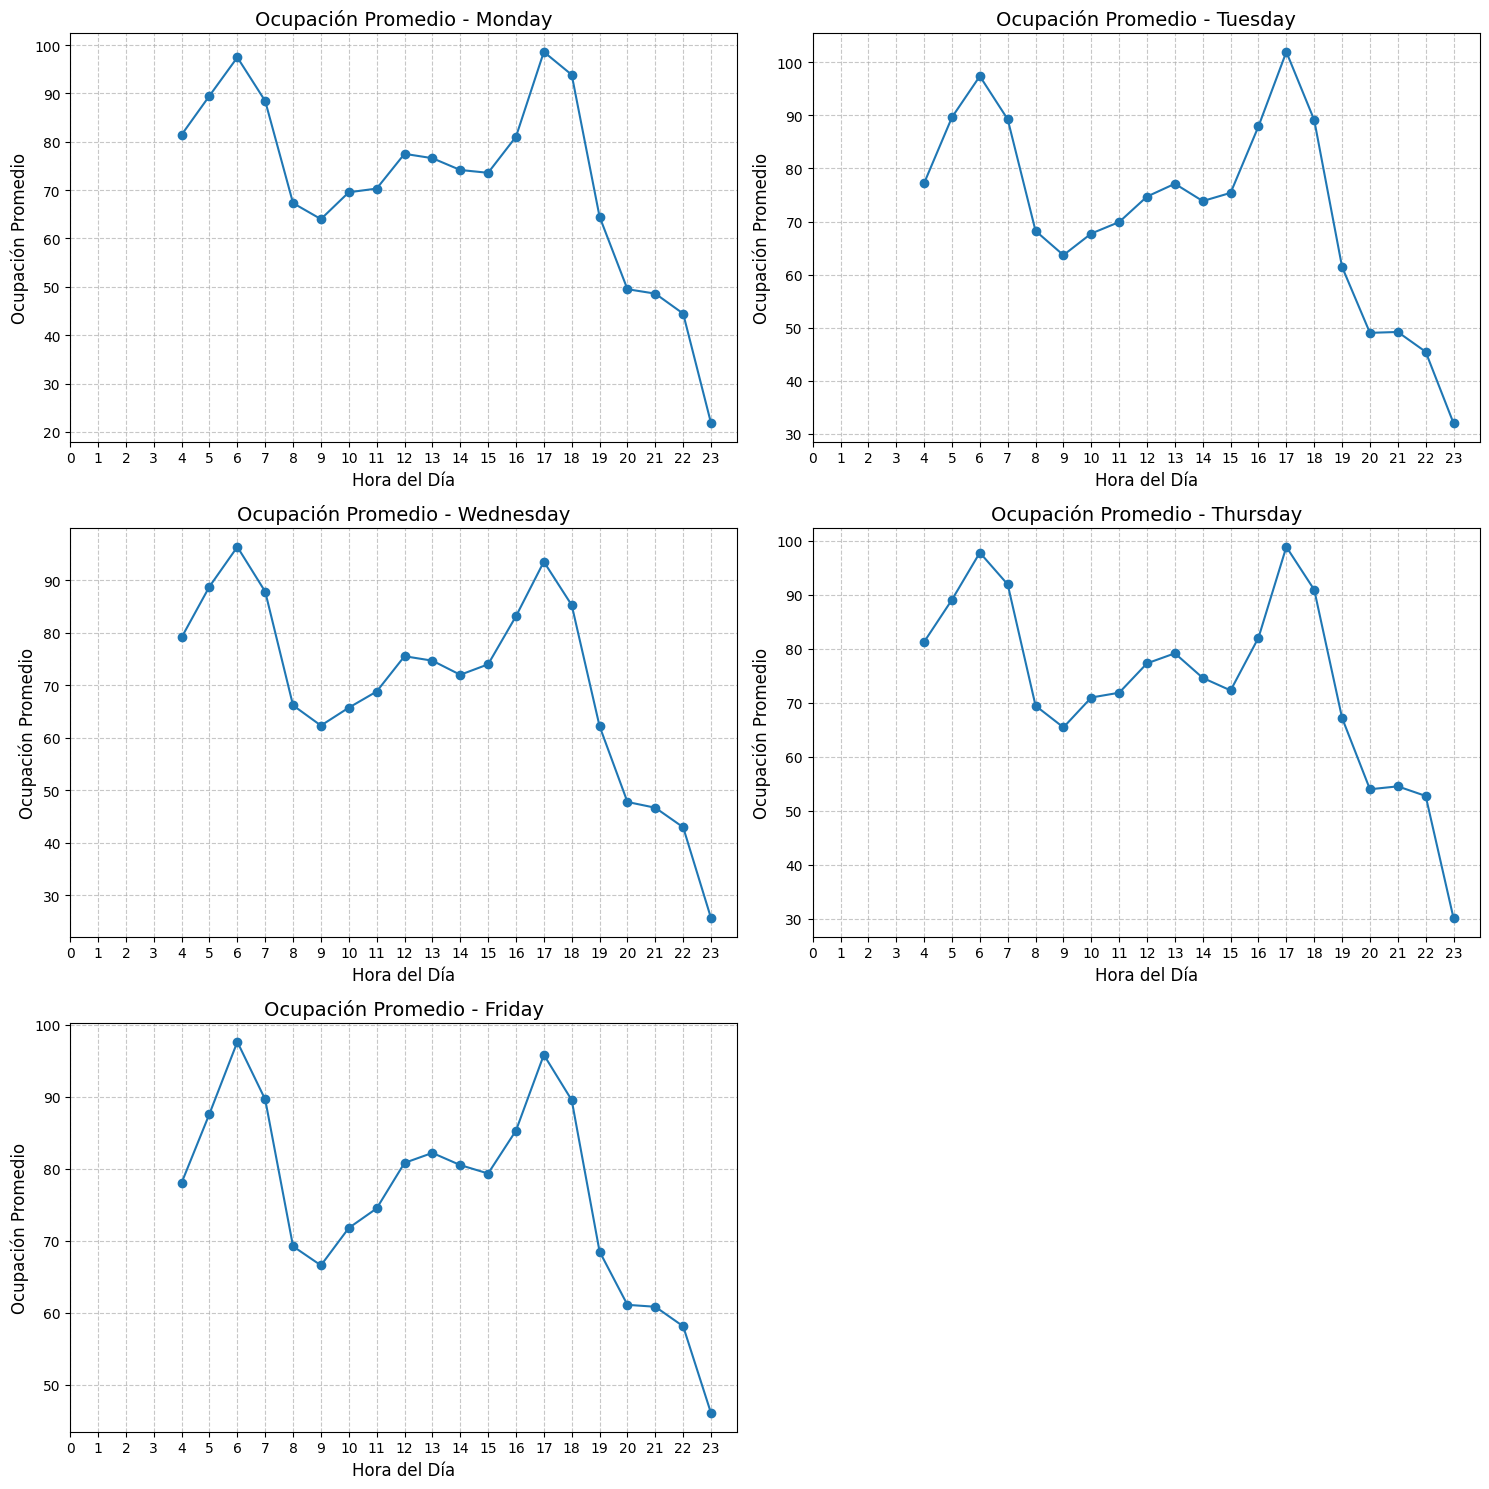

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'fecha' a tipo datetime y extraer el día de la semana
data['fecha'] = pd.to_datetime(data['fecha'])
data['dia_semana'] = data['fecha'].dt.day_name()

# Obtener los días únicos y ordenarlos en formato estándar
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_presentes = [dia for dia in dias_ordenados if dia in data['dia_semana'].unique()]

# Configurar la cantidad de filas y columnas para los subplots
cols = 2
rows = -(-len(dias_presentes) // cols)  # Redondeo hacia arriba

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Convertir en lista para iterar fácilmente

# Generar gráficos por día de la semana
for i, dia in enumerate(dias_presentes):
    ax = axes[i]
    ocupacion_horaria = data[data['dia_semana'] == dia].groupby('hora')['estimacionOcupacionAbordo'].mean()
    
    ax.plot(ocupacion_horaria.index, ocupacion_horaria.values, marker='o')
    ax.set_title(f'Ocupación Promedio - {dia}', fontsize=14)
    ax.set_xlabel('Hora del Día', fontsize=12)
    ax.set_ylabel('Ocupación Promedio', fontsize=12)
    ax.grid(linestyle='--', alpha=0.7)
    ax.set_xticks(range(0, 24))

# Ocultar subplots vacíos si hay más espacios de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

# Agrupar por franja horaria y ruta, calculando la ocupación promedio
rutas_mas_ocupadas = (
    data.groupby(['franja_horaria', 'nombre_ruta'], observed=True)['estimacionOcupacionAbordo']
    .mean()
    .reset_index()
)

# Eliminar posibles NaN en 'estimacionOcupacionAbordo'
rutas_mas_ocupadas = rutas_mas_ocupadas.dropna(subset=['estimacionOcupacionAbordo'])

# Obtener el Top 5 rutas más ocupadas por franja horaria
rutas_top_5 = (
    rutas_mas_ocupadas.sort_values(['franja_horaria', 'estimacionOcupacionAbordo'], ascending=[True, False])
    .groupby('franja_horaria', observed=True)
    .head(5)
    .reset_index(drop=True)
)

rutas_top_5

,franja_horaria,nombre_ruta,estimacionOcupacionAbordo
0,4-8am,K16 Portal Eldorado,139.374680
1,4-8am,B12 Portal Norte,136.389461
2,4-8am,K54 Portal Eldorado,131.138680
3,4-8am,K10 Portal Eldorado,130.305682
4,4-8am,D22 Portal 80,129.698630
5,8am-4pm,J23 Las Aguas,102.859143
6,8am-4pm,F23 Portal Américas,97.645456
7,8am-4pm,B10 Portal Norte,95.929807
8,8am-4pm,F60 Portal Américas,95.759754
9,8am-4pm,K16 Portal Eldorado,94.513851


In [45]:
data

,fecha,fechaHoraLecturaDato,NombreParada,nombre_ruta,numero_estacion,latitud_parada,longitud_parada,latitud_parada0,longitud_parada0,latitud_parada25,...,latitud_parada50,longitud_parada50,latitud_parada75,longitud_parada75,latitud_parada100,longitud_parada100,estimacionOcupacionAbordo,hora,dia_semana,franja_horaria
0,2023-10-23,1900-01-01 15:47:38,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,90.0,15,Monday,8am-4pm
1,2023-10-23,1900-01-01 23:22:56,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,56.0,23,Monday,6-11pm
2,2023-10-23,1900-01-01 21:43:21,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,70.0,21,Monday,6-11pm
3,2023-10-23,1900-01-01 20:08:01,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,63.0,20,Monday,6-11pm
4,2023-10-23,1900-01-01 23:07:26,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,...,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,72.0,23,Monday,6-11pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317736,2023-11-03,1900-01-01 17:18:07,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,77.0,17,Friday,4-6pm
1317737,2023-11-03,1900-01-01 15:01:31,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,121.0,15,Friday,8am-4pm
1317738,2023-11-03,1900-01-01 10:18:04,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,53.0,10,Friday,8am-4pm
1317739,2023-11-03,1900-01-01 18:29:38,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,...,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,120.0,18,Friday,6-11pm


In [48]:
import folium
import pandas as pd

# Eliminar NaN en franja_horaria y estimacionOcupacionAbordo
data_clean = data.dropna(subset=['franja_horaria', 'nombre_ruta', 'estimacionOcupacionAbordo'])

# Agrupar por franja horaria y ruta, obteniendo la ruta más ocupada por franja
rutas_mas_ocupadas = (
    data_clean.groupby(['franja_horaria', 'nombre_ruta'], observed=True)['estimacionOcupacionAbordo']
    .mean()
    .reset_index()
)

# Verificar si hay datos antes de aplicar idxmax()
if not rutas_mas_ocupadas.empty:
    rutas_top = (
        rutas_mas_ocupadas.sort_values(['franja_horaria', 'estimacionOcupacionAbordo'], ascending=[True, False])
        .groupby('franja_horaria', observed=True)
        .first()
        .reset_index()
    )
else:
    rutas_top = pd.DataFrame(columns=['franja_horaria', 'nombre_ruta', 'estimacionOcupacionAbordo'])

# Función para asignar colores basados en percentiles
def get_color(value, percentiles):
    if value <= percentiles[0]:
        return '#ff0000'  # Rojo (baja ocupación)
    elif value <= percentiles[1]:
        return '#ff8080'  # Rosa claro
    elif value <= percentiles[2]:
        return '#ffffff'  # Blanco (ocupación media)
    elif value <= percentiles[3]:
        return '#80ff80'  # Verde claro
    else:
        return '#006400'  # Verde (alta ocupación)

# Diccionario para almacenar los mapas por franja horaria
mapas_rutas = {}

# Generar mapas con la ruta más ocupada por franja horaria con colores basados en percentiles
for franja in rutas_top['franja_horaria'].unique():
    datos_ruta = data_clean[(data_clean['franja_horaria'] == franja) & 
                            (data_clean['nombre_ruta'] == rutas_top.loc[rutas_top['franja_horaria'] == franja, 'nombre_ruta'].values[0])]

    # Agrupar por parada y calcular ocupación promedio
    ruta_grouped = datos_ruta.groupby(['latitud_parada', 'longitud_parada'])['estimacionOcupacionAbordo'].mean().reset_index()
    
    # Calcular percentiles para la ocupación promedio
    percentiles = ruta_grouped['estimacionOcupacionAbordo'].quantile([0.2, 0.4, 0.6, 0.8]).values

    # Crear mapa centrado en la ruta más ocupada
    mapa = folium.Map(location=[ruta_grouped['latitud_parada'].mean(), ruta_grouped['longitud_parada'].mean()], zoom_start=12)

    # Dibujar el trayecto de la ruta con marcadores de colores
    for _, row in ruta_grouped.iterrows():
        color = get_color(row['estimacionOcupacionAbordo'], percentiles)
        
        folium.CircleMarker(
            location=[row['latitud_parada'], row['longitud_parada']],
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"Ocupación: {row['estimacionOcupacionAbordo']:.2f}"
        ).add_to(mapa)

    # Guardar el mapa en el diccionario
    mapas_rutas[franja] = mapa

# Mostrar los mapas
for franja, mapa in mapas_rutas.items():
    print(f"Mapa de la ruta más ocupada para la franja horaria: {franja}")
    display(mapa)

Mapa de la ruta más ocupada para la franja horaria: 4-8am


Mapa de la ruta más ocupada para la franja horaria: 8am-4pm


Mapa de la ruta más ocupada para la franja horaria: 4-6pm


Mapa de la ruta más ocupada para la franja horaria: 6-11pm


In [50]:
import folium
from matplotlib import cm

# Crear una copia de los datos para trabajar con las franjas horarias
data['franja_horaria'] = pd.cut(data['hora'], 
                                bins=[0, 4, 8, 16, 18, 24], 
                                labels=['0-4am', '4-8am', '8am-4pm', '4-6pm', '6-11pm'],
                                right=False)

# Filtrar franjas horarias relevantes
franjas_interes = ['4-8am', '8am-4pm', '4-6pm', '6-11pm']
data_franjas = data[data['franja_horaria'].isin(franjas_interes)]

# Definir función para asignar colores por percentiles
def get_color(value, percentiles):
    if value <= percentiles[0]:
        return '#ff0000'  # Rojo (baja ocupación)
    elif value <= percentiles[1]:
        return '#ff8080'  # Rosa claro
    elif value <= percentiles[2]:
        return '#ffffff'  # Blanco (ocupación media)
    elif value <= percentiles[3]:
        return '#80ff80'  # Verde claro
    else:
        return '#006400'  # Verde (alta ocupación)

# Crear mapas por cada franja horaria
maps = {}
for franja in franjas_interes:
    franja_data = data_franjas[data_franjas['franja_horaria'] == franja]
    
    # Agrupar por parada y calcular ocupación promedio
    franja_grouped = franja_data.groupby(['NombreParada', 'latitud_parada', 'longitud_parada'])['estimacionOcupacionAbordo'].mean().reset_index()
    
    # Calcular percentiles para la ocupación promedio
    percentiles = franja_grouped['estimacionOcupacionAbordo'].quantile([0.2, 0.4, 0.6, 0.8]).values
    
    # Crear el mapa
    franja_map = folium.Map(location=[franja_grouped['latitud_parada'].mean(), franja_grouped['longitud_parada'].mean()], zoom_start=12)
    
    # Añadir puntos al mapa
    for _, row in franja_grouped.iterrows():
        color = get_color(row['estimacionOcupacionAbordo'], percentiles)
        
        folium.CircleMarker(
            location=[row['latitud_parada'], row['longitud_parada']],
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['NombreParada']}: {row['estimacionOcupacionAbordo']:.2f}"
        ).add_to(franja_map)
    
    maps[franja] = franja_map  # Guardar el mapa

# Mostrar mapas
for franja, mapa in maps.items():
    print(f"Mapa de la franja horaria: {franja}")
    display(mapa)

/var/folders/2c/j4kc42250j3gmnrnhq7lphd80000gq/T/ipykernel_34796/3117560247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['franja_horaria'] = pd.cut(data['hora'],


Mapa de la franja horaria: 4-8am


Mapa de la franja horaria: 8am-4pm


Mapa de la franja horaria: 4-6pm


Mapa de la franja horaria: 6-11pm


# Commute

In [51]:
maps['4-8am']

In [52]:
maps['4-6pm']

In [53]:
# Convertir 'fechaHoraLecturaDato' a datetime para extraer las horas si aún no se ha hecho
if 'hora' not in data.columns:
    data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S', errors='coerce')
    data['hora'] = data['fechaHoraLecturaDato'].dt.hour

# Agrupar por 'hora', 'latitud_parada', y 'longitud_parada', y sumar la ocupación
grouped_data = data.groupby(['hora', 'latitud_parada', 'longitud_parada'], as_index=False)['estimacionOcupacionAbordo'].sum()

# Selección de columnas relevantes para la nueva matriz de correlación
correlation_columns_grouped = ['hora', 'latitud_parada', 'longitud_parada', 'estimacionOcupacionAbordo']
correlation_data_grouped = grouped_data[correlation_columns_grouped]

# Calcular la matriz de correlación
correlation_matrix_grouped = correlation_data_grouped.corr()

# Mantener solo la parte inferior de la matriz de correlación
mask_grouped = np.triu(np.ones_like(correlation_matrix_grouped, dtype=bool))
lower_triangle_matrix_grouped = correlation_matrix_grouped.mask(mask_grouped)

# Mostrar la matriz de correlación truncada
lower_triangle_matrix_grouped

,hora,latitud_parada,longitud_parada,estimacionOcupacionAbordo
hora,NaN,NaN,NaN,NaN
latitud_parada,0.007311,NaN,NaN,NaN
longitud_parada,0.014684,0.543834,NaN,NaN
estimacionOcupacionAbordo,-0.167053,0.060245,0.241534,NaN
